In [1]:
#!pip install kagglehub[pandas-datasets]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

# 3.1 Download and overview of data

In [3]:
!mv "/home/codespace/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1/WA_Fn-UseC_-Telco-Customer-Churn.csv" .

mv: cannot stat '/home/codespace/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1/WA_Fn-UseC_-Telco-Customer-Churn.csv': No such file or directory


In [4]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 3.2 Data preparation

In [6]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


### Normalize column names

In [7]:
df.columns = df.columns.str.lower().str.replace(' ','_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')
    
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [8]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [9]:
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [10]:
# there was '_' for this column if there is no data. So we converted it to nan
df.totalcharges = pd.to_numeric(df.totalcharges,errors = 'coerce')

In [11]:
df.isnull().sum()

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [12]:
df.totalcharges = df.totalcharges.fillna(0)

In [13]:
df.churn.unique()

array(['no', 'yes'], dtype=object)

In [14]:
# For now we will only modify one categorical variable 'churn'
df.churn = (df.churn == 'yes').astype('int64')

In [15]:
df.churn.unique()

array([0, 1])

# 3.3 Setting up the validation framework

In [16]:
#!pip install scikit-learn

In [17]:
#!python3 -m pip install --upgrade pip

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [20]:
features = [ 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges']
target = ['churn']

In [21]:
X = df[features]
y = df[target]
X_train_val,X_test,y_train_val,y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

In [22]:
len(X_train_val),len(y_train_val)

(5634, 5634)

In [23]:
X_train,X_val,y_train,y_val = train_test_split(X_train_val,y_train_val,test_size = (20/80),random_state=1)

In [24]:
len(X_train),len(X_val),len(X_test)

(4225, 1409, 1409)

# 3.4 EDA

In [25]:
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [26]:
y_train.churn.value_counts(normalize = True)

churn
0    0.731361
1    0.268639
Name: proportion, dtype: float64

In [27]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [28]:
numerical = ['tenure','monthlycharges','totalcharges']
categorical = [ 'gender', 'seniorcitizen', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']
Id = ['customerid']

In [29]:
df[categorical].nunique() # Check on original data set

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [30]:
X_train[categorical].nunique() # check on training set

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [31]:
# churn rate: percentage of customers opted out from services
# churn is a categorical variable {0,1} 0=no churn, 1 = churn. So mean will be churn rate mean = sum/no of records
churn_rate_train = y_train.mean()
churn_rate_train

churn    0.268639
dtype: float64

In [32]:
churn_rate_val = y_val.mean()
churn_rate_val

churn    0.273953
dtype: float64

In [33]:
churn_rate_test = y_test.mean()
churn_rate_test

churn    0.246984
dtype: float64

# 3.5 Feature importance: Churn rate and risk ratio

Feature importance analysis (part of EDA) - identifying which features affect our target variable

- Churn rate
- Risk ratio
- Mutual information - later

In [34]:
churn_female = df[df.gender == 'female'].churn.mean()
churn_female

np.float64(0.26920871559633025)

In [35]:
churn_male = df[df.gender == 'male'].churn.mean()
churn_male

np.float64(0.2616033755274262)

In [36]:
global_churn = df.churn.mean()

In [37]:
global_churn-churn_male

np.float64(0.0037664952662697093)

In [38]:
global_churn/churn_male # risk ratio

np.float64(1.0143977319049342)

In [39]:
global_churn-churn_female 

np.float64(-0.003838844802634356)

In [40]:
global_churn/churn_female # risk ratio

np.float64(0.9857402655254647)

In [41]:
# pandas way of doing
df_groupby_gender = df.groupby('gender').churn.agg(['mean','count'])
df_groupby_gender.columns = df_groupby_gender.columns.str.replace('mean','churn_rate')
df_groupby_gender

,churn_rate,count
gender,,
female,0.269209,3488
male,0.261603,3555


In [42]:
from IPython.display import display
for c in categorical:
        print(c)
        df_groupby = df.groupby(c).churn.agg(['mean','count'])
        df_groupby.columns = df_groupby.columns.str.replace('mean','churn_rate')
        df_groupby['diff with global churn rate'] = df_groupby['churn_rate']-global_churn
        df_groupby['risk_ratio'] = df_groupby['churn_rate']/global_churn
        display(df_groupby)
        print('\n\n')

gender


,churn_rate,count,diff with global churn rate,risk_ratio
gender,,,,
female,0.269209,3488,0.003839,1.014466
male,0.261603,3555,-0.003766,0.985807





seniorcitizen


,churn_rate,count,diff with global churn rate,risk_ratio
seniorcitizen,,,,
0,0.236062,5901,-0.029308,0.889557
1,0.416813,1142,0.151443,1.570686





partner


,churn_rate,count,diff with global churn rate,risk_ratio
partner,,,,
no,0.329580,3641,0.064210,1.241964
yes,0.196649,3402,-0.068721,0.741038





dependents


,churn_rate,count,diff with global churn rate,risk_ratio
dependents,,,,
no,0.312791,4933,0.047422,1.178700
yes,0.154502,2110,-0.110868,0.582215





phoneservice


,churn_rate,count,diff with global churn rate,risk_ratio
phoneservice,,,,
no,0.249267,682,-0.016103,0.939319
yes,0.267096,6361,0.001726,1.006506





multiplelines


,churn_rate,count,diff with global churn rate,risk_ratio
multiplelines,,,,
no,0.250442,3390,-0.014927,0.943749
no_phone_service,0.249267,682,-0.016103,0.939319
yes,0.286099,2971,0.020729,1.078114





internetservice


,churn_rate,count,diff with global churn rate,risk_ratio
internetservice,,,,
dsl,0.189591,2421,-0.075779,0.714441
fiber_optic,0.418928,3096,0.153558,1.578656
no,0.074050,1526,-0.191320,0.279044





onlinesecurity


,churn_rate,count,diff with global churn rate,risk_ratio
onlinesecurity,,,,
no,0.417667,3498,0.152297,1.573906
no_internet_service,0.074050,1526,-0.191320,0.279044
yes,0.146112,2019,-0.119258,0.550597





onlinebackup


,churn_rate,count,diff with global churn rate,risk_ratio
onlinebackup,,,,
no,0.399288,3088,0.133918,1.504645
no_internet_service,0.074050,1526,-0.191320,0.279044
yes,0.215315,2429,-0.050055,0.811377





deviceprotection


,churn_rate,count,diff with global churn rate,risk_ratio
deviceprotection,,,,
no,0.391276,3095,0.125906,1.474456
no_internet_service,0.074050,1526,-0.191320,0.279044
yes,0.225021,2422,-0.040349,0.847951





techsupport


,churn_rate,count,diff with global churn rate,risk_ratio
techsupport,,,,
no,0.416355,3473,0.150985,1.568960
no_internet_service,0.074050,1526,-0.191320,0.279044
yes,0.151663,2044,-0.113706,0.571517





streamingtv


,churn_rate,count,diff with global churn rate,risk_ratio
streamingtv,,,,
no,0.335231,2810,0.069861,1.263261
no_internet_service,0.074050,1526,-0.191320,0.279044
yes,0.300702,2707,0.035332,1.133143





streamingmovies


,churn_rate,count,diff with global churn rate,risk_ratio
streamingmovies,,,,
no,0.336804,2785,0.071434,1.269188
no_internet_service,0.074050,1526,-0.191320,0.279044
yes,0.299414,2732,0.034044,1.128291





contract


,churn_rate,count,diff with global churn rate,risk_ratio
contract,,,,
month-to-month,0.427097,3875,0.161727,1.609440
one_year,0.112695,1473,-0.152675,0.424672
two_year,0.028319,1695,-0.237051,0.106714





paperlessbilling


,churn_rate,count,diff with global churn rate,risk_ratio
paperlessbilling,,,,
no,0.163301,2872,-0.102069,0.615371
yes,0.335651,4171,0.070281,1.264842





paymentmethod


,churn_rate,count,diff with global churn rate,risk_ratio
paymentmethod,,,,
bank_transfer_(automatic),0.167098,1544,-0.098271,0.629681
credit_card_(automatic),0.152431,1522,-0.112939,0.574410
electronic_check,0.452854,2365,0.187484,1.706502
mailed_check,0.191067,1612,-0.074303,0.720003


## 3.6 - Feature Importance: Mutual Information

In [43]:
from sklearn.metrics import mutual_info_score

In [44]:
mutual_info_score(X_train.contract,y_train.churn)

0.09901566414272059

In [45]:
mutual_info_score(X_train.gender,y_train.churn)

0.0001620761772512247

In [46]:
mutual_info_score(df.dependents,df.churn)

0.014467261139424592

In [47]:
mutual_info_score(df.partner,df.churn)

0.011453657253317984

In [48]:
def mututal_info_score_func(series):
    return mutual_info_score(series,y_train_val.churn)

In [49]:
scores = X_train_val[categorical].apply(mututal_info_score_func)

In [50]:
scores.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## 3.7 - Feature Importance: Correlation

In [51]:
X_train_val[numerical]

,tenure,monthlycharges,totalcharges
1814,12,19.70,258.35
5946,42,73.90,3160.55
3881,71,65.15,4681.75
2389,71,85.45,6300.85
3676,30,70.40,2044.75
...,...,...,...
905,9,100.50,918.60
5192,60,19.95,1189.90
3980,28,105.70,2979.50
235,2,54.40,114.10


In [52]:
y_train_val

,churn
1814,0
5946,1
3881,0
2389,0
3676,0
...,...
905,1
5192,0
3980,1
235,1


In [53]:
X_train_val[numerical].corrwith(y_train_val.reset_index(drop = True)['churn'])

tenure            0.011012
monthlycharges    0.007760
totalcharges      0.015164
dtype: float64

## 3.8 One-hot encoding

In [54]:
from sklearn.feature_extraction import DictVectorizer

In [55]:
dv = DictVectorizer(sparse=False)

In [56]:
dicts = X_train[categorical+numerical].to_dict(orient='records')

In [57]:
X_train_ohe = dv.fit_transform(dicts)
X_train_ohe

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+01, 1.02155e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 4.13650e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.00000e+00, 1.90050e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.70000e+01, 7.61950e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.00000e+00, 7.51650e+02]], shape=(4225, 45))

In [58]:
val_dicts = X_val[categorical+numerical].to_dict(orient='records')

In [59]:
X_val_ohe = dv.transform(val_dicts)
X_val_ohe

array([[0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 1.0000e+00, 7.1000e+01,
        4.9734e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.0750e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.0350e+01],
       ...,
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 1.8000e+01,
        1.0581e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        9.3300e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 3.0000e+00,
        2.9285e+02]], shape=(1409, 45))

## 3.9 Logistic regression

- Binary classification
- Linear vs logistic regression

In [60]:
def sigmoid(z):
    return 1/(1+np.exp(-1*z))

In [61]:
z = np.linspace(-10,10,100)

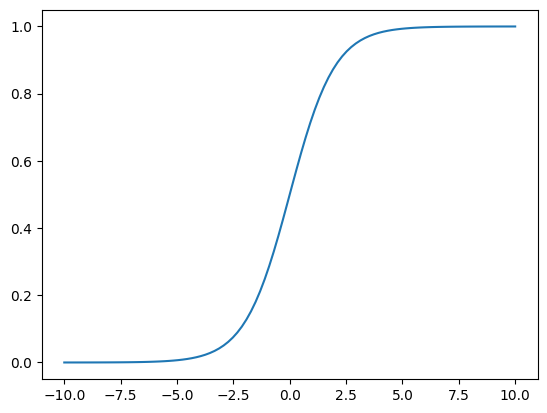

In [62]:
plt.plot(z,sigmoid(z))

# 3.10 Training logistic regression with Scikit-Learn

- Train a model with Scikit-Learn
- Apply it to the validation dataset
- Calculate the accuracy

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
model = LogisticRegression()

In [65]:
model.fit(X_train_ohe,y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [66]:
model.coef_[0].round(3)

array([ 0.564, -0.154, -0.519, -0.013, -0.095,  0.071, -0.098, -0.082,
       -0.033, -0.076, -0.354,  0.343, -0.098,  0.002, -0.251,  0.162,
       -0.02 ,  0.066, -0.098, -0.076,  0.251, -0.098, -0.261, -0.228,
        0.119, -0.121,  0.012, -0.095, -0.03 ,  0.045, -0.028,  0.162,
       -0.271,  0.221, -0.097, -0.098,  0.087, -0.05 , -0.098,  0.039,
        0.194, -0.098, -0.205, -0.072,  0.   ])

In [67]:
model.intercept_[0].round(3)

np.float64(-0.111)

In [68]:
y_pred = model.predict(X_val_ohe).reshape(-1,1)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]], shape=(1409, 1))

In [69]:
y_pred_prob = model.predict_proba(X_val_ohe)[:,1]

In [70]:
y_val.shape,y_pred.shape

((1409, 1), (1409, 1))

In [71]:
correct_pred = (y_val == y_pred)

In [72]:
correct_df = pd.DataFrame()

In [73]:
correct_df['actual'] = y_val
correct_df['prediction'] = y_pred
correct_df['probability'] = y_pred_prob
correct_df['correct_prediction'] = correct_pred

In [74]:
correct_df

,actual,prediction,probability,correct_prediction
565,0,0,0.007863,True
199,0,0,0.209928,True
6738,0,0,0.223710,True
2504,1,1,0.561123,True
556,0,0,0.219586,True
...,...,...,...,...
5790,0,0,0.297790,True
3834,1,0,0.035463,False
806,0,0,0.150149,True
6240,1,1,0.776681,True


In [75]:
accuracy = correct_df.correct_prediction.mean()
accuracy

np.float64(0.801277501774308)

# 3.11 - Model Interpretation
- Look at the coefficients
- Train a smaller model with fewer features

In [76]:
dict(zip(dv.get_feature_names_out(),model.coef_[0]))

{'contract=month-to-month': np.float64(0.5641033707139324),
 'contract=one_year': np.float64(-0.1537342402110269),
 'contract=two_year': np.float64(-0.5191557053034028),
 'dependents=no': np.float64(-0.013297786742578789),
 'dependents=yes': np.float64(-0.09548878805611075),
 'deviceprotection=no': np.float64(0.0712426185083021),
 'deviceprotection=no_internet_service': np.float64(-0.0982489918265308),
 'deviceprotection=yes': np.float64(-0.08178020147834959),
 'gender=female': np.float64(-0.03252893509311798),
 'gender=male': np.float64(-0.07625763970511554),
 'internetservice=dsl': np.float64(-0.3536634640038689),
 'internetservice=fiber_optic': np.float64(0.3431258810380101),
 'internetservice=no': np.float64(-0.0982489918265308),
 'monthlycharges': np.float64(0.002076870590915297),
 'multiplelines=no': np.float64(-0.2505953891772919),
 'multiplelines=no_phone_service': np.float64(0.16203116596420356),
 'multiplelines=yes': np.float64(-0.02022235158526442),
 'onlinebackup=no': np.fl

In [91]:
small_feat_set = ['contract','tenure','monthlycharges'] 

In [92]:
X_small_train = X_train[small_feat_set].reset_index(drop=True)
X_small_train.head()

,contract,tenure,monthlycharges
0,two_year,72,115.50
1,month-to-month,10,95.25
2,month-to-month,5,75.55
3,month-to-month,5,80.85
4,two_year,18,20.10


In [93]:
X_small_val = X_val[small_feat_set].reset_index(drop=True)
X_small_val.head()

,contract,tenure,monthlycharges
0,two_year,71,70.85
1,month-to-month,1,20.75
2,month-to-month,1,20.35
3,month-to-month,2,75.70
4,month-to-month,1,19.90


In [94]:
dv1 = DictVectorizer(sparse = False)

In [95]:
dicts_train = X_small_train.to_dict(orient='records')

In [96]:
dv1.fit(dicts_train)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [97]:
dv1.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [98]:
X_train_small_ohe = dv1.transform(dicts_train)

In [99]:
model_small = LogisticRegression()

In [100]:
model_small.fit(X_train_small_ohe,y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [101]:
coef,bias = model_small.coef_[0], model_small.intercept_[0]

- As the duration of contract increases, probability of churn decreased

In [114]:
# month to month contract
churn_prob = sigmoid(1*coef[0]+1*coef[3]+50*coef[-1]+bias)
churn_prob

np.float64(0.035956197514530934)

In [115]:
# one_year contract
churn_prob = sigmoid(1*coef[1]+1*coef[3]+50*coef[-1]+bias)
churn_prob

np.float64(0.013602984027330175)

In [116]:
# two_year contract
churn_prob = sigmoid(1*coef[2]+1*coef[3]+50*coef[-1]+bias)
churn_prob

np.float64(0.005441396430716262)

- As monthly charges increase, churn probability decreased, which is counter intuitive as per general 
  customer behaviour

In [128]:
# month to month contract
churn_prob = sigmoid(1*coef[0]+1*coef[3]+10*coef[-1]+bias)
churn_prob

np.float64(0.13690549312134634)

In [129]:
# month to month contract
churn_prob = sigmoid(1*coef[0]+1*coef[3]+20*coef[-1]+bias)
churn_prob

np.float64(0.09946942372155597)

In [130]:
# month to month contract
churn_prob = sigmoid(1*coef[0]+1*coef[3]+30*coef[-1]+bias)
churn_prob

np.float64(0.07142293741923368)